In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import pickle
%matplotlib inline

In [ ]:
df_train = pd.read_csv('/content/drive/MyDrive/IRS_practice_module/Training.csv')
df_test = pd.read_csv('/content/drive/MyDrive/IRS_practice_module/Testing.csv')

# 1. Data Pre-processing

In [ ]:
df_train.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis,Unnamed: 133
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
3,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,Fungal infection,NaN


In [ ]:
df_test.head()

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Fungal infection
1,0,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Allergy
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,GERD
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chronic cholestasis
4,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [ ]:
df_train = df_train.drop(columns='Unnamed: 133')

In [ ]:
df_train.columns[df_train.isnull().any()]

Index([], dtype='object')

In [ ]:
df_test.columns[df_test.isnull().any()]

Index([], dtype='object')

In [ ]:
def clean_col_name(col_name):
  col_name = col_name.replace('.1','').replace('(typhos)','').replace('yellowish','yellow').replace('yellowing','yellow')
  return col_name

In [ ]:
df_train.columns = list(map(clean_col_name, list(df_train.columns)))

In [ ]:
df_test.columns = list(map(clean_col_name, list(df_test.columns)))

# 2. EDA

In [ ]:
from scipy.stats import chi2_contingency
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
disease_columns = list(df_train['prognosis'])
symptom_columns = list(df_train.columns[:-1])

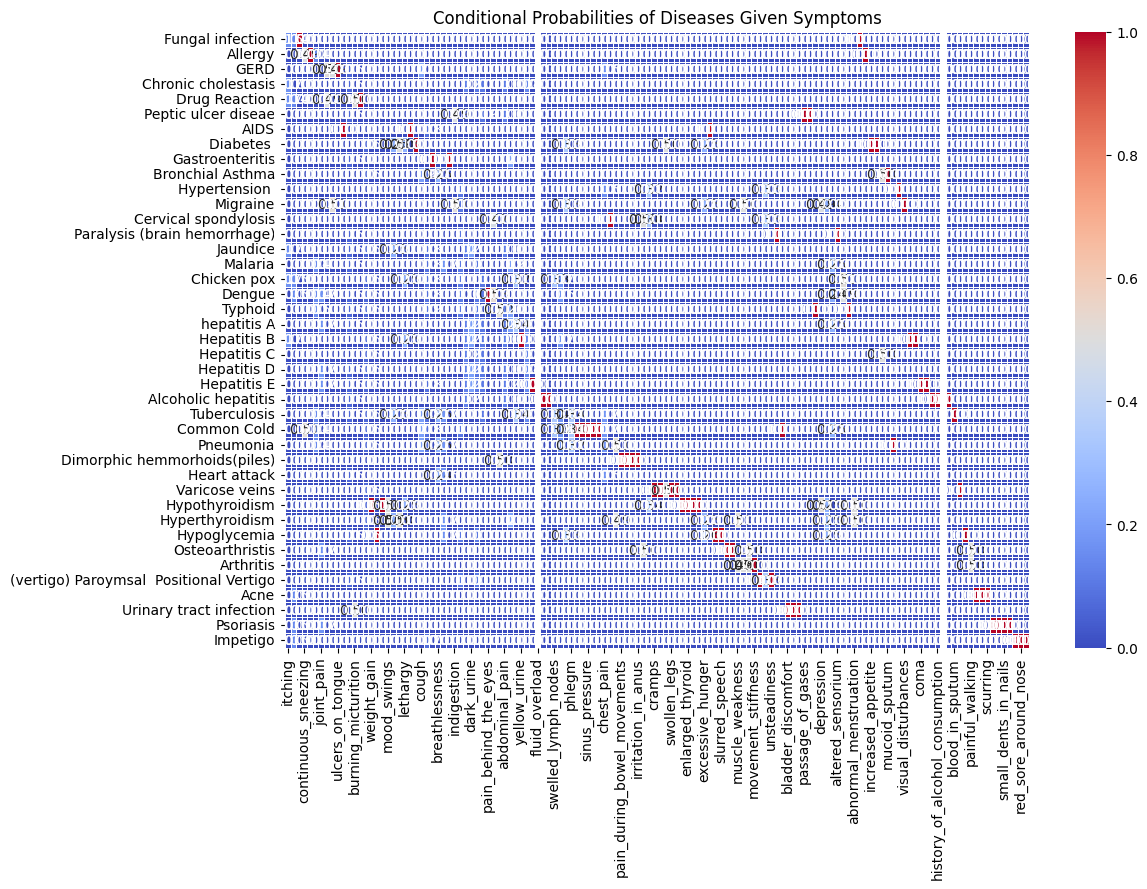

In [ ]:
associations_df = pd.DataFrame(columns=['Symptom', 'Disease', 'Probability'])
disease_column = 'prognosis'
# Calculate conditional probabilities for each symptom-disease pair


# Calculate P(Symptom)
p_disease = df_train[disease_column].value_counts(normalize=True)

# Calculate P(Symptom)
p_symptom = df_train[symptom_columns].mean()

# Create an empty dictionary to store conditional probabilities
disease_given_symptom_dict = {}

# Calculate conditional probabilities for each unique disease
for disease in df_train[disease_column].unique():
    mask = (df_train[disease_column] == disease)
    symptoms_given_disease = df_train[mask][symptom_columns].mean()

    # Calculate P(Disease | Symptom) using Bayes' theorem
    disease_given_symptom = (symptoms_given_disease * p_disease[disease]) / p_symptom

    # Store the result in the dictionary
    disease_given_symptom_dict[disease] = disease_given_symptom

# Create a DataFrame from the dictionary
disease_given_symptom_df = pd.DataFrame(disease_given_symptom_dict).T

# Create a heatmap to visualize associations
plt.figure(figsize=(12, 8))
sns.heatmap(disease_given_symptom_df, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
plt.title('Conditional Probabilities of Diseases Given Symptoms')
plt.show()

In [ ]:
disease_given_symptom_df

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,pus_filled_pimples,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze
Fungal infection,0.159292,0.137405,1.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Allergy,0.000000,0.000000,0.0,0.486486,1.0,0.135338,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
GERD,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.513514,0.486486,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Chronic cholestasis,0.168142,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Drug Reaction,0.168142,0.137405,0.0,0.000000,0.0,0.000000,0.000000,0.486486,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Peptic ulcer diseae,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AIDS,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Diabetes,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Gastroenteritis,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Bronchial Asthma,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 3. OneVsRest Decision Tree Classifier

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.metrics import classification_report, log_loss, roc_auc_score, confusion_matrix, multilabel_confusion_matrix
from sklearn.metrics import roc_curve, auc

In [ ]:
X_train = df_train.iloc[:, :-1].values
y_train = df_train.iloc[:, -1].values
X_test = df_test.iloc[:, :-1].values
y_test = df_test.iloc[:, -1].values

In [ ]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [ ]:
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = OneVsRestClassifier(base_classifier)

param_grid = {
    'estimator__max_depth': [10, 20, 30],  # Example hyperparameter values for max_depth
    'estimator__min_samples_split': [2, 5, 10],  # Example hyperparameter values for min_samples_split
}

grid_search = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier = grid_search.best_estimator_


Fitting 10 folds for each of 9 candidates, totalling 90 fits


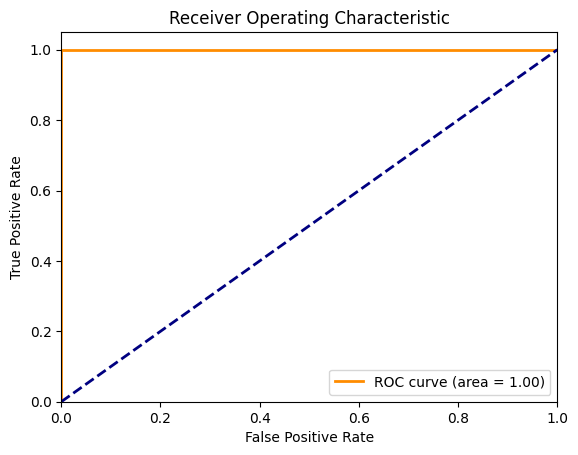

ROC AUC Score (Average): 0.99
Log Loss: 0.87
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [ ]:
Y_pred_prob = best_classifier.predict_proba(X_test)

# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier.predict(X_test)
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


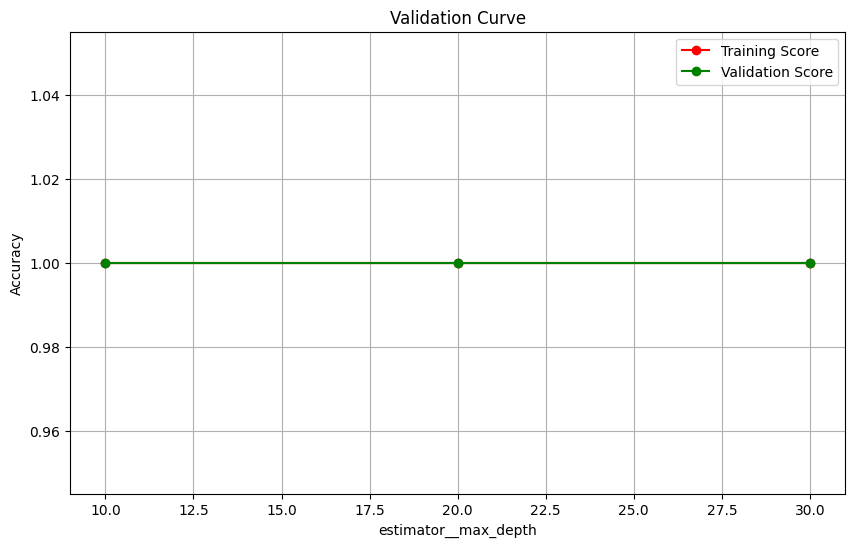

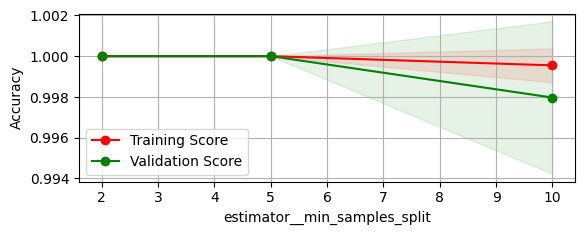

In [ ]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [ ]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier, '{}onevsrest_decision_tree_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}onevsrest_decision_tree_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/onevsrest_decision_tree_multilabel_binarizer.joblib']

In [ ]:
tmp = dict(df_train.iloc[0])
user_input = []
for k, v in tmp.items():
  if k != 'prognosis':
    if v.all() == 1:
      user_input.append(k)
#print(user_input)

In [ ]:
user_input

['itching', 'skin_rash', 'nodal_skin_eruptions', 'dischromic _patches']

## Predicting diseases using the above model

In [ ]:
!python -m spacy download en_core_web_md

2023-09-30 13:03:21.191828: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 MB 11.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_md')


In [ ]:
import pandas as pd
import spacy
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
from itertools import product

In [ ]:

# Load a spaCy model for semantic similarity (you can choose a model like 'en_core_web_md')
nlp = spacy.load('en_core_web_md')

symptom_columns = list(df_train.columns[:-1])
user_symptoms = ["itching", "skin_rash", "joint_pain"]

# Create a DataFrame with the fixed symptom columns
all_possible_symptoms_df = pd.DataFrame(columns=symptom_columns)

# Initialize a list to store the closest matching symptoms
closest_matches = []

# Find the closest matching symptoms for each user symptom
for user_symptom in user_symptoms:
    # Tokenize user's symptom by splitting on underscores
    user_tokens = user_symptom.split("_")

    # Initialize variables to store the best match and its similarity score
    best_match = None
    best_similarity = 0

    # Iterate through all possible symptoms to find the best match
    for possible_symptom in symptom_columns:
        # Tokenize the possible symptom by splitting on underscores
        possible_tokens = possible_symptom.split("_")

        # Calculate semantic similarity using spaCy's similarity score
        user_text = " ".join(user_tokens)
        possible_text = " ".join(possible_tokens)
        semantic_similarity = nlp(user_text).similarity(nlp(possible_text))

        # Calculate syntactic similarity using fuzzy string matching (fuzzywuzzy)
        syntactic_similarity = fuzz.ratio(user_text, possible_text)

        # Calculate an overall similarity score as a combination of semantic and syntactic similarity
        overall_similarity = (semantic_similarity + syntactic_similarity) / 2

        # Update the best match if the current symptom has a higher similarity
        if overall_similarity > best_similarity:
            best_match = possible_symptom
            best_similarity = overall_similarity

    # Add the closest matching symptom to the list
    closest_matches.append(best_match)

# Print the closest matching symptoms for each user symptom
for user_symptom, closest_match in zip(user_symptoms, closest_matches):
    print(f"User Symptom: {user_symptom} | Closest Match: {closest_match}")

<ipython-input-304-7b9ea587c021>:30: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  semantic_similarity = nlp(user_text).similarity(nlp(possible_text))


User Symptom: itching | Closest Match: itching
User Symptom: skin_rash | Closest Match: skin_rash
User Symptom: joint_pain | Closest Match: joint_pain


In [ ]:

# Define a list of different example user symptoms
user_symptoms_list = [
    ["itching", "rashes", "joint_pain"],
    ["fever", "chills", "nausea"],
    ["stomach_pain", "vomiting"],
]

# Create a DataFrame with the fixed symptom columns
all_possible_symptoms_df = pd.DataFrame(columns=symptom_columns)

# Initialize a list to store the closest matching symptoms for each user symptom list
all_closest_matches = []

# Function to calculate semantic similarity using spaCy
def calculate_semantic_similarity(token_list1, token_list2):
    text1 = " ".join(token_list1)
    text2 = " ".join(token_list2)
    return nlp(text1).similarity(nlp(text2))

# Iterate through different example user symptom lists
for user_symptoms in user_symptoms_list:
    # Normalize case (convert to lowercase) for user symptoms
    user_symptoms = [symptom.lower() for symptom in user_symptoms]

    # Initialize a list to store the closest matching symptoms for each user symptom
    closest_matches = []

    # Iterate through user symptoms
    for user_symptom in user_symptoms:
        # Tokenize user's symptom by splitting on underscores
        user_tokens = user_symptom.split("_")

        # Initialize variables to store the best match and its similarity score
        best_match = None
        best_similarity = 0

        # Iterate through all possible symptoms to find the best match
        for possible_symptom in symptom_columns:
            # Tokenize the possible symptom by splitting on underscores
            possible_tokens = possible_symptom.split("_")

            # Calculate semantic similarity using spaCy's similarity score
            semantic_similarity = calculate_semantic_similarity(user_tokens, possible_tokens)

            # Calculate syntactic similarity using fuzzy string matching (fuzzywuzzy)
            syntactic_similarity = fuzz.ratio(user_symptom, possible_symptom)

            # Calculate an overall similarity score as a combination of semantic and syntactic similarity
            overall_similarity = (semantic_similarity + syntactic_similarity) / 2

            # Update the best match if the current symptom has a higher similarity
            if overall_similarity > best_similarity:
                best_match = possible_symptom
                best_similarity = overall_similarity

        # Add the closest matching symptom to the list
        closest_matches.append(best_match)

    # Add the list of closest matching symptoms to the overall list
    all_closest_matches.append(closest_matches)


<ipython-input-305-74875753ea3f>:18: UserWarning: [W008] Evaluating Doc.similarity based on empty vectors.
  return nlp(text1).similarity(nlp(text2))


In [ ]:
def create_multilabel_data(user_symptoms):
    # Initialize an empty DataFrame with symptom columns
    user_data = pd.DataFrame(columns=symptom_columns)

    # Set the corresponding columns to 1 based on the user's closest matches
    for closest_match in user_symptoms:
        user_data.loc[0, closest_match] = 1  # Assuming 0 is the row index

    return user_data

In [ ]:


classifier_name = '{}onevsrest_decision_tree_classifier.joblib'.format(dir_name)
mlb_name = '{}onevsrest_decision_tree_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    disease_labels = mlb_diseases.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    for i, label in enumerate(disease_labels):
        results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(user_input)
for disease, probability in prediction.items():
    print(f"Disease: {disease}, Probability: {probability:.2f}")




  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                    1                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Disease: ('Fungal infection',), Probability: 0.00


# OneVsRest Logistic Regression

In [ ]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
estimator__solvers = ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky']
estimator__penalty = ['l2']
base_classifier_logreg = LogisticRegression()
estimator__c_values = [ 0.01, 0.001, 0.0001]

param_grid = dict(estimator__solver=estimator__solvers,estimator__penalty=estimator__penalty,estimator__C=estimator__c_values)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = OneVsRestClassifier(base_classifier_logreg)

grid_search_logreg = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_logreg = grid_search_logreg.best_estimator_


Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


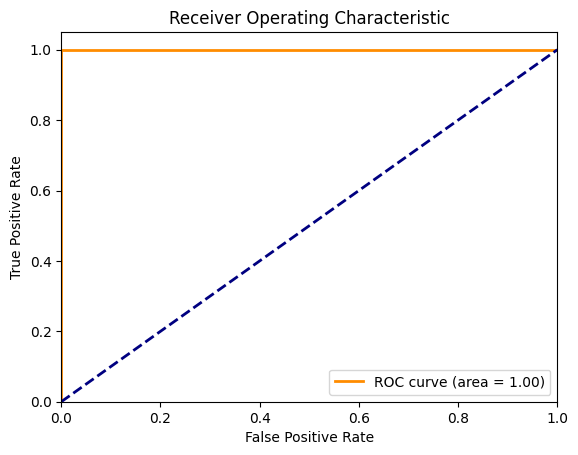

ROC AUC Score (Average): 1.00
Log Loss: 1.52
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [ ]:
Y_pred_prob = best_classifier_logreg.predict_proba(X_test)

# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_logreg.predict(X_test)
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


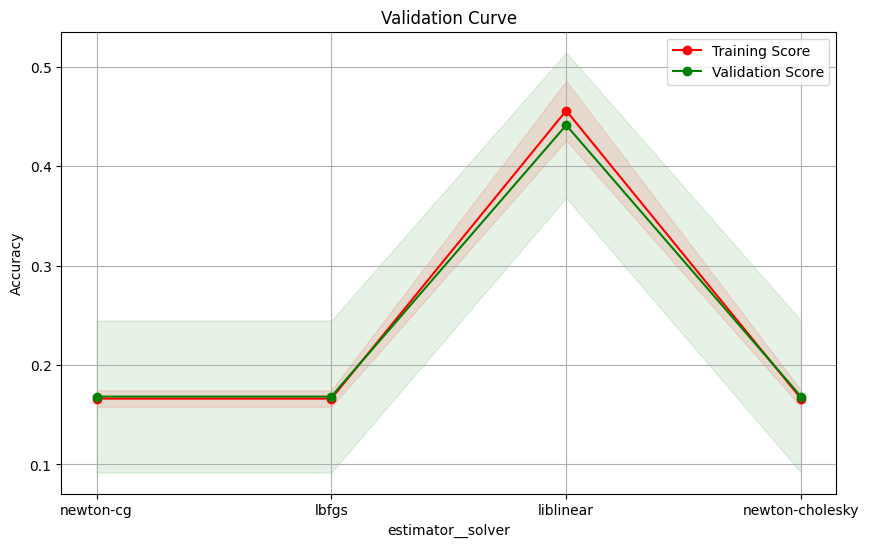

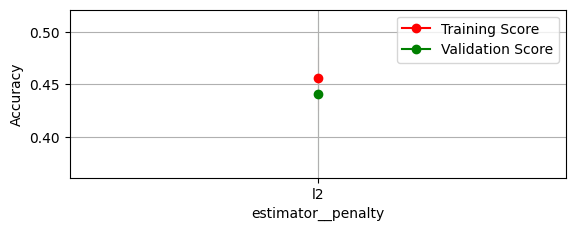

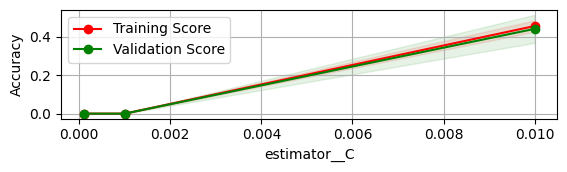

In [ ]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_logreg, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [ ]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_logreg, '{}onevsrest_logreg_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}onevsrest_logreg_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/onevsrest_logreg_multilabel_binarizer.joblib']

In [ ]:
from joblib import load

classifier_name = '{}onevsrest_logreg_classifier.joblib'.format(dir_name)
mlb_name = '{}onevsrest_logreg_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
[[0.07452459 0.08016931 0.12647265 0.07355111 0.08447784 0.08055026
  0.0747349  0.08037197 0.13329947 0.12213707 0.06683502 0.08059421
  0.07280317 0.08186917 0.18742556 0.20334721 0.07364243 0.08173805
  0.08120687 0.09254592 0.07085617 0.05825177 0.05766892 0.07847035
  0.0726833  0.06872362 0.0720797  0.11641401 0.10705074 0.06849206
  0.07527994 0.07

# OneVsRest Multinomial Naive Bayes

In [ ]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:

base_classifier_nb = MultinomialNB()
alpha = [0.01, 0.1, 0.5, 1.0, 2.0]

param_grid = dict(estimator__alpha=alpha)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = OneVsRestClassifier(base_classifier_nb)

grid_search_nb = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_nb.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_nb = grid_search_nb.best_estimator_


Fitting 10 folds for each of 5 candidates, totalling 50 fits


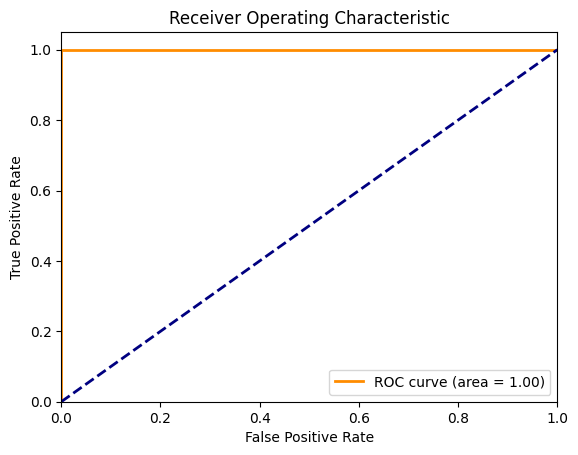

ROC AUC Score (Average): 1.00
Log Loss: 0.22
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [ ]:
Y_pred_prob = best_classifier_nb.predict_proba(X_test)

# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_nb.predict(X_test)
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


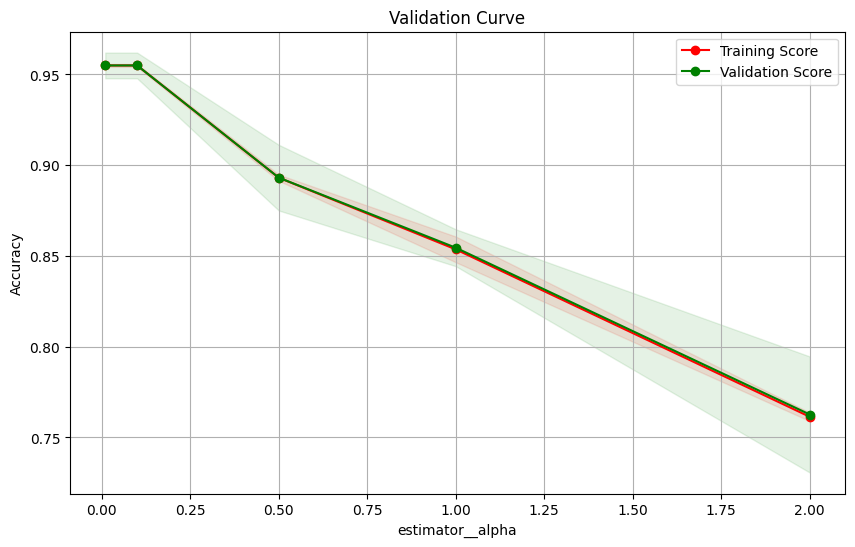

In [ ]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_nb, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [ ]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_nb, '{}onevsrest_naive_bayes_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}onevsrest_naive_bayes_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/onevsrest_naive_bayes_multilabel_binarizer.joblib']

In [ ]:
from joblib import load

classifier_name = '{}onevsrest_naive_bayes_classifier.joblib'.format(dir_name)
mlb_name = '{}onevsrest_naive_bayes_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
[[1.31534531e-08 3.18715061e-08 4.24828205e-04 9.43723512e-09
  3.27710967e-08 1.87082714e-08 1.33933871e-08 1.95326273e-08
  4.00596537e-01 1.29324513e-04 1.41811595e-09 2.89752529e-05
  4.44393114e-09 1.87082714e-08 7.77924047e-01 8.40557866e-01
  1.36398631e-08 3.18715061e-08 3.18715061e-08 4.11667946e-05
  1.31534531e-08 5.64070170e-09 2.52901591e-09 

# OneVsRest SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [ ]:
base_classifier_svm = SVC(probability=True)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'estimator__C': [0.1, 1, 10],  # Regularization parameter
    'estimator__kernel': ['linear', 'rbf', 'poly'],  # Kernel types to try
}

classifier = OneVsRestClassifier(base_classifier_svm)

grid_search_svm = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_svm = grid_search_svm.best_estimator_


Fitting 10 folds for each of 9 candidates, totalling 90 fits


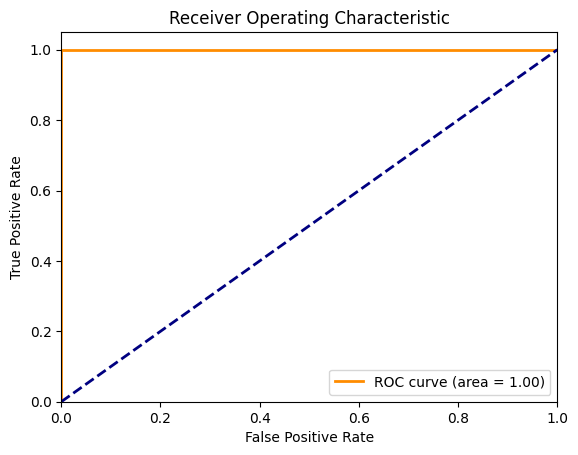

ROC AUC Score (Average): 1.00
Log Loss: 0.03
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [ ]:
Y_pred_prob = best_classifier_svm.predict_proba(X_test)

# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_svm.predict(X_test)
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


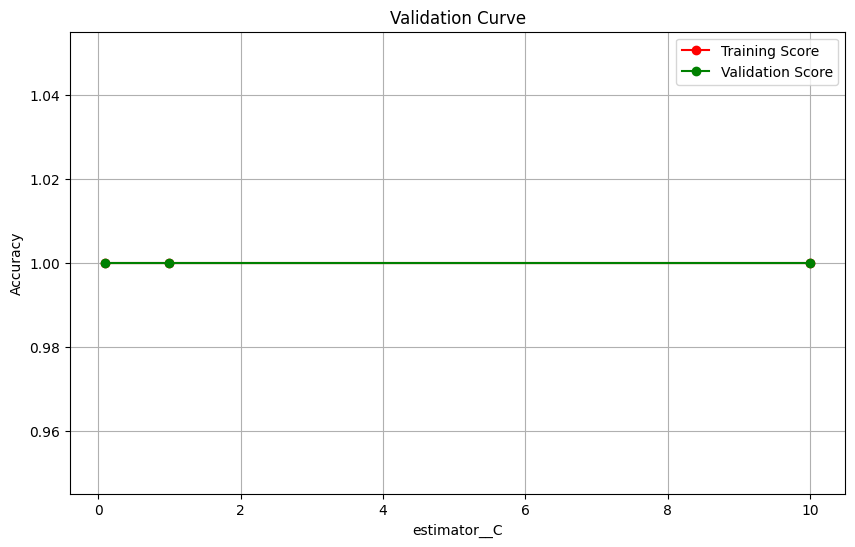

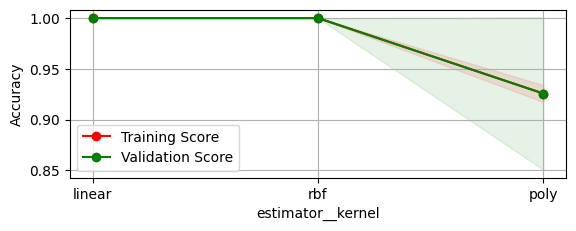

In [ ]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_svm, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [333]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_svm, '{}onevsrest_svm_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}onevsrest_svm_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/onevsrest_svm_multilabel_binarizer.joblib']

In [334]:
from joblib import load

classifier_name = '{}onevsrest_svm_classifier.joblib'.format(dir_name)
mlb_name = '{}onevsrest_svm_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
[[7.93962743e-05 2.20902824e-04 1.53060383e-03 1.87403513e-04
  6.84727432e-04 4.92697385e-04 1.54935503e-04 5.58027531e-04
  1.34615541e-03 5.24986540e-03 1.45145162e-04 3.88466914e-05
  2.38448759e-04 4.85056748e-04 1.16917149e-02 1.99278233e-01
  6.41537030e-05 9.18810711e-04 8.91203812e-04 1.64354475e-04
  2.04656223e-05 4.11831914e-07 5.32352328e-05 

# BinaryRelevance Decision tree

In [367]:
!pip install scikit-multilearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.4/89.4 kB 1.1 MB/s eta 0:00:00


In [368]:
from skmultilearn.problem_transform import BinaryRelevance

In [369]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
#disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.fit_transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [370]:
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = OneVsRestClassifier(base_classifier)

param_grid = {
    'estimator__max_depth': [10, 20, 30],  # Example hyperparameter values for max_depth
    'estimator__min_samples_split': [2, 5, 10],  # Example hyperparameter values for min_samples_split
}

grid_search = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier = grid_search.best_estimator_


Fitting 10 folds for each of 9 candidates, totalling 90 fits


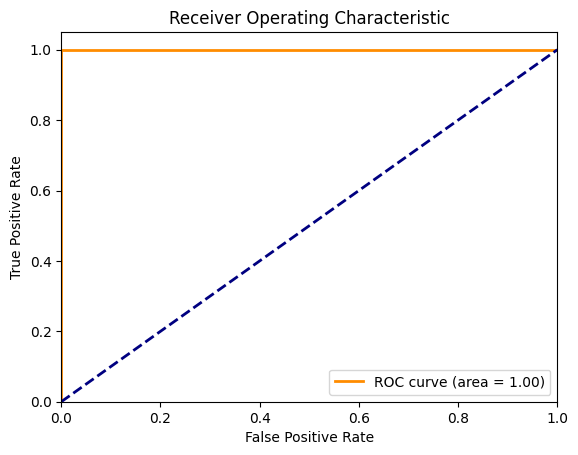

ROC AUC Score (Average): 0.99
Log Loss: 0.87
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [371]:
Y_pred_prob = best_classifier.predict_proba(X_test)

# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier.predict(X_test)
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


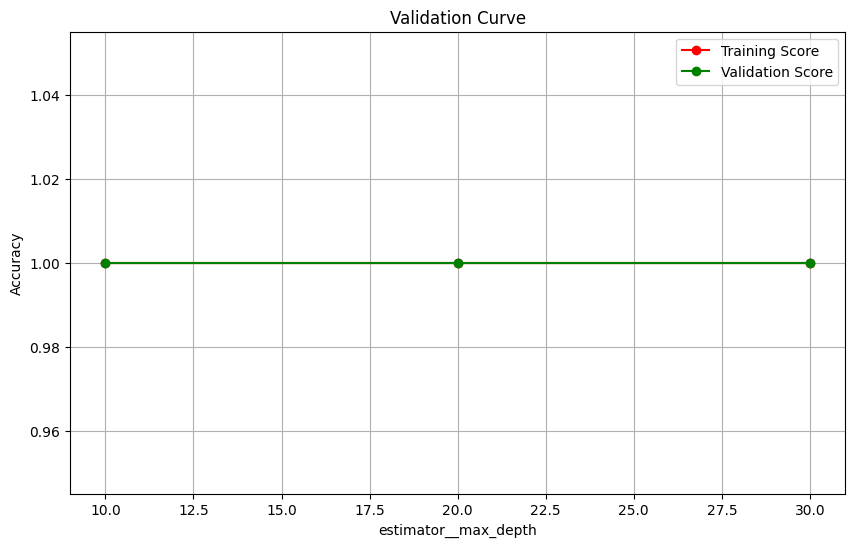

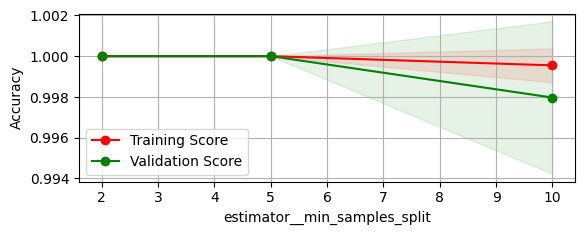

In [372]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [373]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier, '{}binaryrelevance_decision_tree_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}binaryrelevance_decision_tree_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/binaryrelevance_decision_tree_multilabel_binarizer.joblib']

In [374]:


classifier_name = '{}binaryrelevance_decision_tree_classifier.joblib'.format(dir_name)
mlb_name = '{}binaryrelevance_decision_tree_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    disease_labels = mlb_diseases.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    for i, label in enumerate(disease_labels):
        results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(user_input)
for disease, probability in prediction.items():
    print(f"Disease: {disease}, Probability: {probability:.2f}")




  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                    1                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Disease: ('Fungal infection',), Probability: 0.00


# BinaryRelevance Logistic Regression

In [375]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [376]:
from sklearn.linear_model import LogisticRegression

In [383]:
estimator__solvers = ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky']
estimator__penalty = ['l2']
base_classifier_logreg = LogisticRegression()
estimator__c_values = [ 0.01, 0.001, 0.0001]

param_grid = dict(classifier__solver=estimator__solvers,  classifier__penalty=estimator__penalty,  classifier__C=estimator__c_values)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = BinaryRelevance(base_classifier_logreg)

grid_search_logreg = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_logreg = grid_search_logreg.best_estimator_


Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


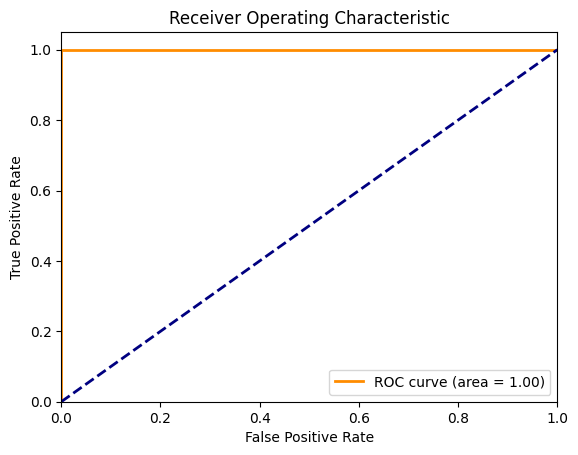

ROC AUC Score (Average): 1.00
Log Loss: 1.52
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [402]:
Y_pred_prob = best_classifier_logreg.predict_proba(X_test)


# Calculate the ROC AUC score for each disease label
Y_pred_prob_dense = Y_pred_prob.toarray()



roc_auc_scores = []

for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob_dense[:, i])
    roc_auc_scores.append(auc_score)
# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob_dense, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob_dense)

Y_pred = best_classifier_logreg.predict(X_test)
Y_pred = Y_pred.toarray()


confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob_dense[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


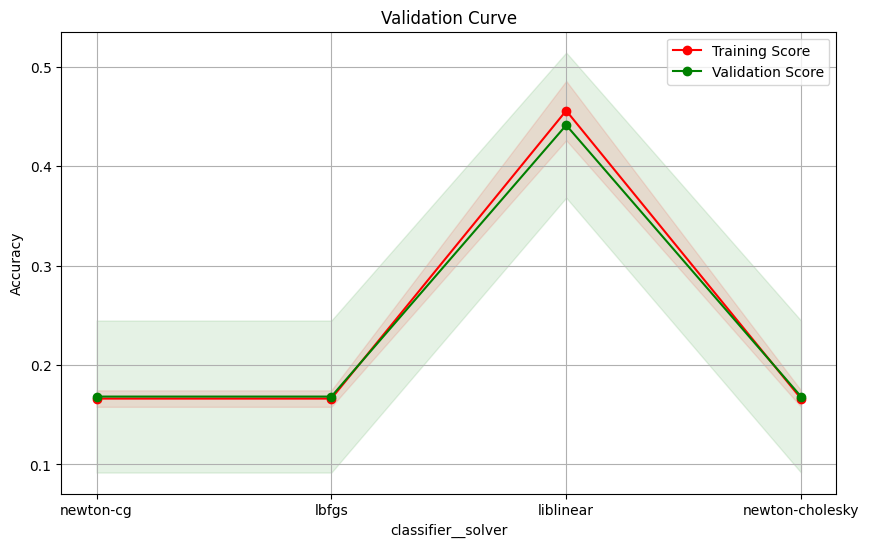

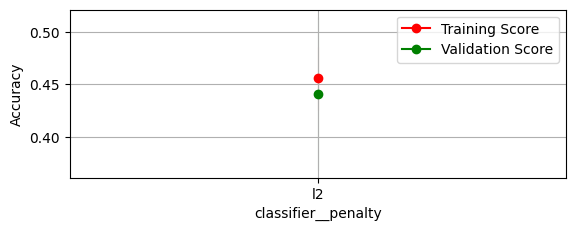

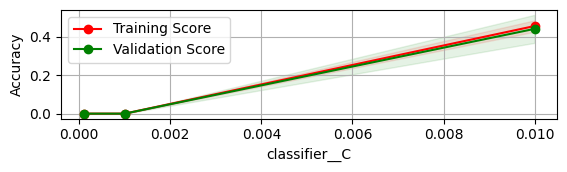

In [403]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_logreg, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [404]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_logreg, '{}binaryrelevance_logreg_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}binaryrelevance_logreg_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/binaryrelevance_logreg_multilabel_binarizer.joblib']

In [407]:


classifier_name = '{}binaryrelevance_logreg_classifier.joblib'.format(dir_name)
mlb_name = '{}binaryrelevance_logreg_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")




  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
  (0, 0)	0.07452459199637934
  (0, 1)	0.08016931210359339
  (0, 2)	0.12647264657913032
  (0, 3)	0.07355110991630433
  (0, 4)	0.08447784222095499
  (0, 5)	0.08055026460174446
  (0, 6)	0.07473490242831599
  (0, 7)	0.08037197195515249
  (0, 8)	0.13329947327102243
  (0, 9)	0.12213706601754461
  (0, 10)	0.06683502288833212
  (0, 11)	0.08059420964269713
  (0, 1

# BinaryRelevance Multinomial Naive Bayes

In [408]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [409]:
from sklearn.naive_bayes import MultinomialNB

In [410]:

base_classifier_nb = MultinomialNB()
alpha = [0.01, 0.1, 0.5, 1.0, 2.0]

param_grid = dict(estimator__alpha=alpha)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = OneVsRestClassifier(base_classifier_nb)

grid_search_nb = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_nb.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_nb = grid_search_nb.best_estimator_


Fitting 10 folds for each of 5 candidates, totalling 50 fits


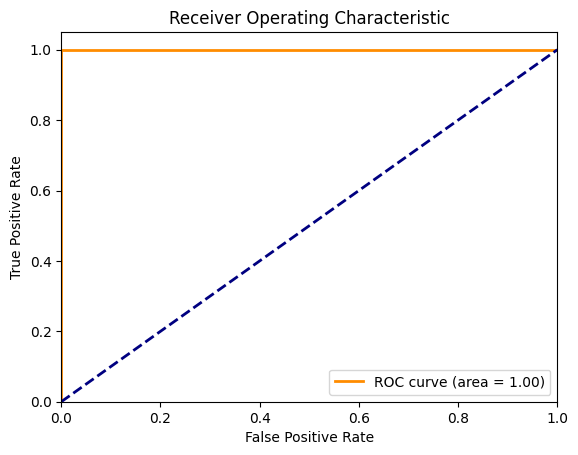

ROC AUC Score (Average): 1.00
Log Loss: 0.22
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [411]:
Y_pred_prob = best_classifier_nb.predict_proba(X_test)

# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_nb.predict(X_test)
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


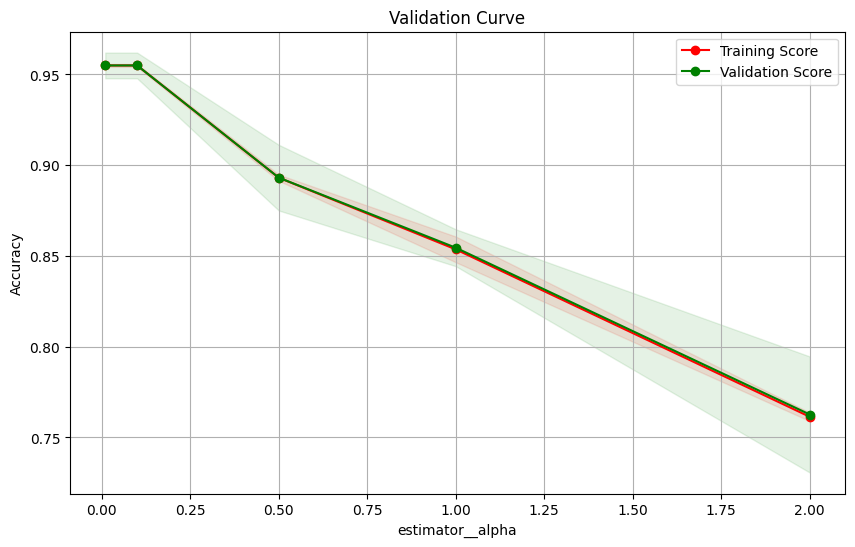

In [412]:
plt.figure(figsize=(10, 6))
index = 1


plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_nb, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [413]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_nb, '{}binaryrelevance_naive_bayes_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}binaryrelevance_naive_bayes_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/binaryrelevance_naive_bayes_multilabel_binarizer.joblib']

In [414]:
from joblib import load

classifier_name = '{}binaryrelevance_naive_bayes_classifier.joblib'.format(dir_name)
mlb_name = '{}binaryrelevance_naive_bayes_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
[[1.31534531e-08 3.18715061e-08 4.24828205e-04 9.43723512e-09
  3.27710967e-08 1.87082714e-08 1.33933871e-08 1.95326273e-08
  4.00596537e-01 1.29324513e-04 1.41811595e-09 2.89752529e-05
  4.44393114e-09 1.87082714e-08 7.77924047e-01 8.40557866e-01
  1.36398631e-08 3.18715061e-08 3.18715061e-08 4.11667946e-05
  1.31534531e-08 5.64070170e-09 2.52901591e-09 

# BinaryRelevance SVM

In [415]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [416]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [417]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [418]:
base_classifier_svm = SVC(probability=True)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'estimator__C': [0.1, 1, 10],  # Regularization parameter
    'estimator__kernel': ['linear', 'rbf', 'poly'],  # Kernel types to try
}

classifier = OneVsRestClassifier(base_classifier_svm)

grid_search_svm = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_svm = grid_search_svm.best_estimator_


Fitting 10 folds for each of 9 candidates, totalling 90 fits


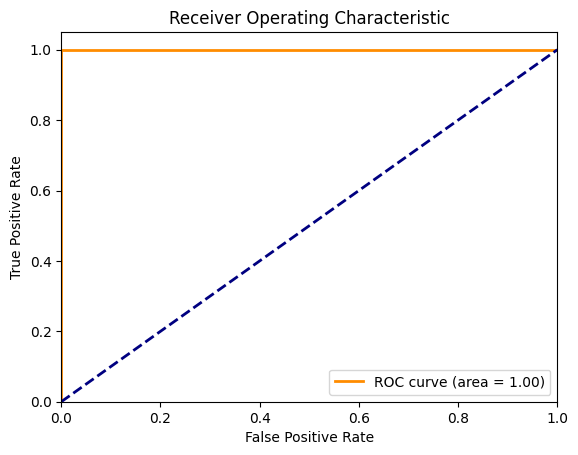

ROC AUC Score (Average): 1.00
Log Loss: 0.02
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [419]:
Y_pred_prob = best_classifier_svm.predict_proba(X_test)

# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_svm.predict(X_test)
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


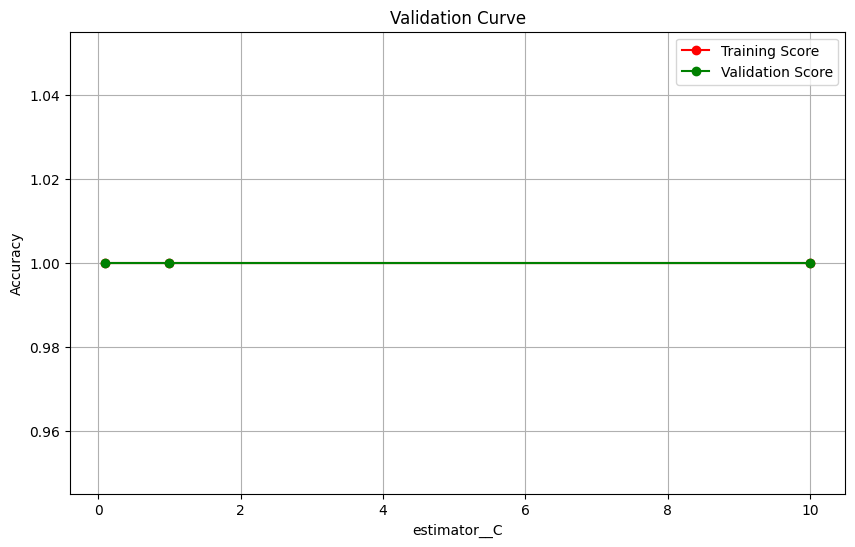

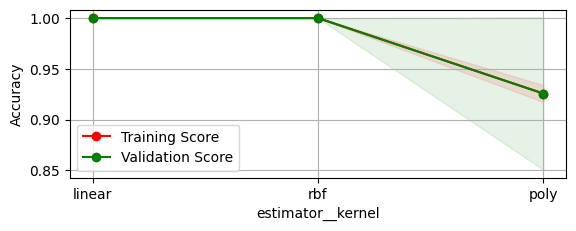

In [421]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_svm, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [422]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_svm, '{}binaryrelevance_svm_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}binaryrelevance_svm_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/binaryrelevance_svm_multilabel_binarizer.joblib']

In [423]:
from joblib import load

classifier_name = '{}binaryrelevance_svm_classifier.joblib'.format(dir_name)
mlb_name = '{}binaryrelevance_svm_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
[[8.11111348e-05 2.20805877e-04 1.53083676e-03 1.87368777e-04
  6.85175191e-04 4.91812895e-04 1.55528898e-04 5.58061996e-04
  1.34658676e-03 5.46717936e-03 1.45186535e-04 3.88257365e-05
  2.38530744e-04 4.85028294e-04 1.16937227e-02 3.72794795e-01
  6.41835894e-05 9.18928753e-04 9.48242723e-04 1.64196648e-04
  2.00068790e-05 4.09319527e-07 5.22917465e-05 

# ClassifierChain Decision Tree

In [424]:
from skmultilearn.problem_transform import ClassifierChain

In [425]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [427]:
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = ClassifierChain(base_classifier)

param_grid = {
    'classifier__max_depth': [10, 20, 30],  # Example hyperparameter values for max_depth
    'classifier__min_samples_split': [2, 5, 10],  # Example hyperparameter values for min_samples_split
}

grid_search = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier = grid_search.best_estimator_


Fitting 10 folds for each of 9 candidates, totalling 90 fits


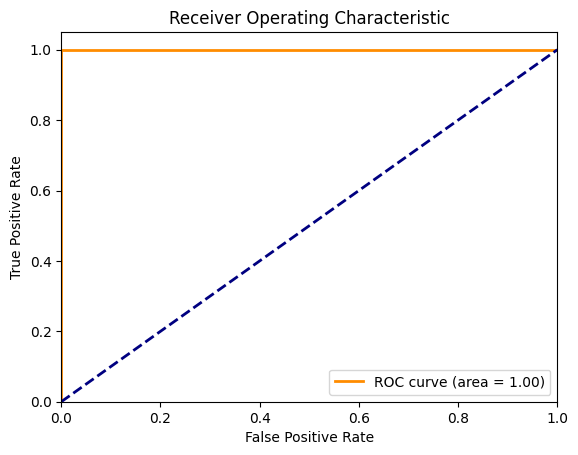

ROC AUC Score (Average): 0.99
Log Loss: 0.88
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       0.50      1.00      0.67         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [430]:
Y_pred_prob = best_classifier.predict_proba(X_test)
Y_pred_prob = Y_pred_prob.toarray()
# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier.predict(X_test)
Y_pred = Y_pred.toarray()

confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


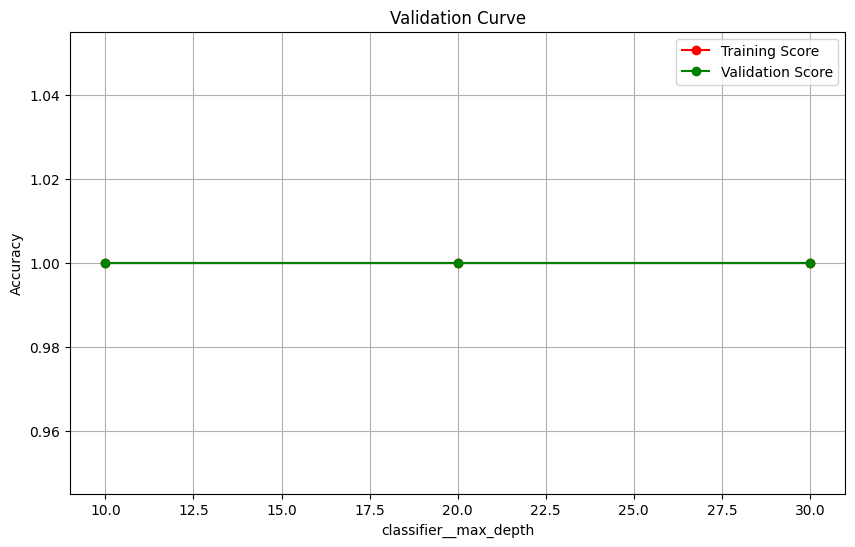

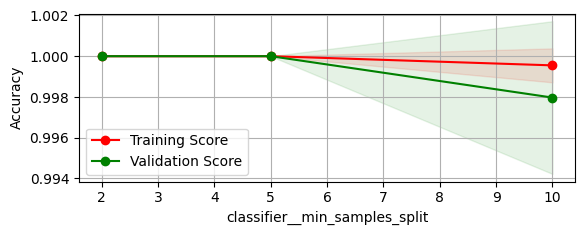

In [431]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [432]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier, '{}classifierchain_decision_tree_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}classifierchain_decision_tree_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/classifierchain_decision_tree_multilabel_binarizer.joblib']

In [439]:


classifier_name = '{}classifierchain_decision_tree_classifier.joblib'.format(dir_name)
mlb_name = '{}classifierchain_decision_tree_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    user_symptoms = user_symptoms.fillna(0)

    print(user_symptoms.values)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values[0])
    predicted_probs = predicted_probs.toarray()
    print(predicted_probs)

    disease_labels = mlb_diseases.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    for i, label in enumerate(disease_labels):
        results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(user_input)
for disease, probability in prediction.items():
    print(f"Disease: {disease}, Probability: {probability:.2f}")




[[1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Disease: ('Fungal infection',), Probability: 0.00


# ClassifierChain Logistic Regression

In [440]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [441]:
from sklearn.linear_model import LogisticRegression

In [442]:
estimator__solvers = ['newton-cg', 'lbfgs', 'liblinear', 'newton-cholesky']
estimator__penalty = ['l2']
base_classifier_logreg = LogisticRegression()
estimator__c_values = [ 0.01, 0.001, 0.0001]

param_grid = dict(classifier__solver=estimator__solvers,classifier__penalty=estimator__penalty,classifier__C=estimator__c_values)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = ClassifierChain(base_classifier_logreg)

grid_search_logreg = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_logreg.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_logreg = grid_search_logreg.best_estimator_


Fitting 10 folds for each of 12 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


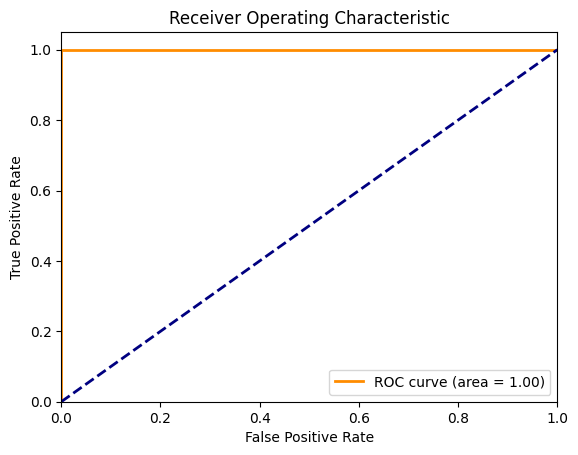

ROC AUC Score (Average): 1.00
Log Loss: 1.52
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [1 0 0 ... 0 0 0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.07      1.00      0.13         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [443]:
Y_pred_prob = best_classifier_logreg.predict_proba(X_test)
Y_pred_prob = Y_pred_prob.toarray()
# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_logreg.predict(X_test)
Y_pred = Y_pred.toarray()
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


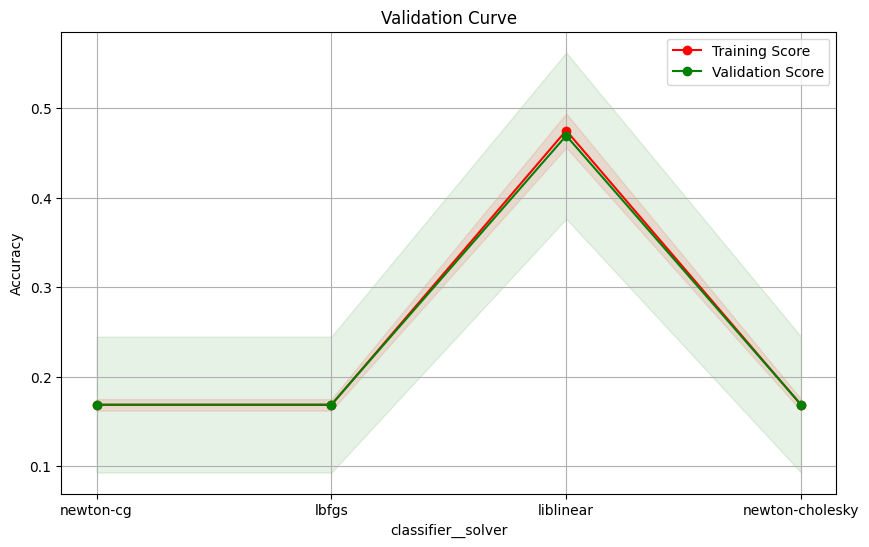

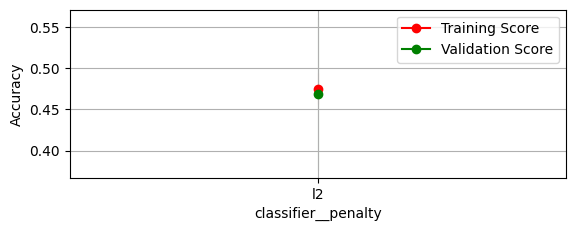

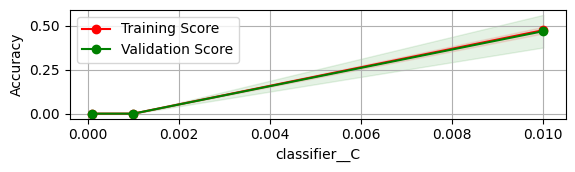

In [444]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_logreg, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [445]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_logreg, '{}classifierchain_logreg_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}classifierchain_logreg_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/classifierchain_logreg_multilabel_binarizer.joblib']

In [446]:
from joblib import load

classifier_name = '{}classifierchain_logreg_classifier.joblib'.format(dir_name)
mlb_name = '{}classifierchain_logreg_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
  (0, 0)	0.07452459199637934
  (0, 1)	0.0801877436445422
  (0, 2)	0.12663431386859902
  (0, 3)	0.07407010456759532
  (0, 4)	0.08514752702977142
  (0, 5)	0.08134774171633782
  (0, 6)	0.07556479135868036
  (0, 7)	0.08130881815630725
  (0, 8)	0.13469883699805366
  (0, 9)	0.12341188396588544
  (0, 10)	0.06784547591395314
  (0, 11)	0.08217848081840899
  (0, 12

# ClassifierChain Multinomial Naive Bayes

In [447]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [448]:
from sklearn.naive_bayes import MultinomialNB

In [450]:

base_classifier_nb = MultinomialNB()
alpha = [0.01, 0.1, 0.5, 1.0, 2.0]

param_grid = dict(classifier__alpha=alpha)

# Create a OneVsRestClassifier to handle multi-label classification
classifier = ClassifierChain(base_classifier_nb)

grid_search_nb = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_nb.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_nb = grid_search_nb.best_estimator_


Fitting 10 folds for each of 5 candidates, totalling 50 fits


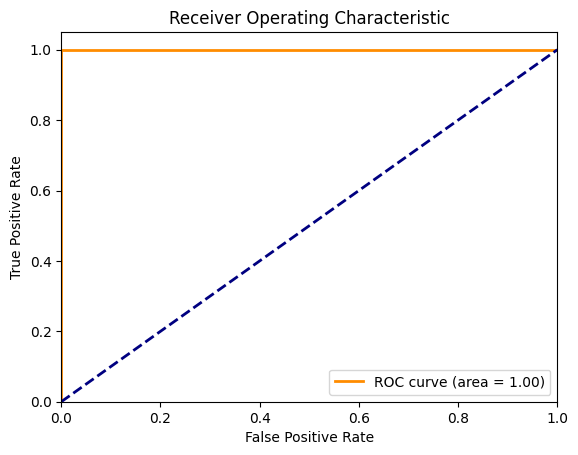

ROC AUC Score (Average): 1.00
Log Loss: 0.21
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [452]:
Y_pred_prob = best_classifier_nb.predict_proba(X_test)
Y_pred_prob = Y_pred_prob.toarray()
# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_nb.predict(X_test)
Y_pred = Y_pred.toarray()

confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


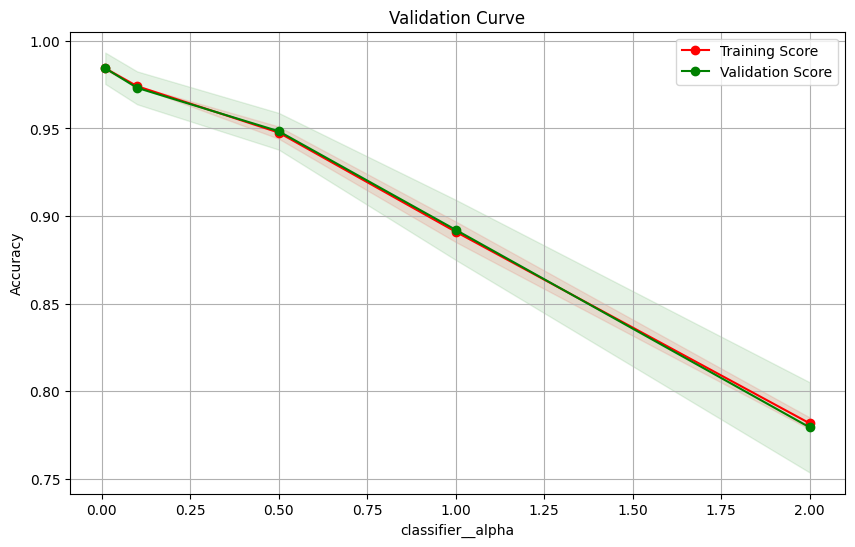

In [453]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_nb, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [454]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_nb, '{}classifierchain_naive_bayes_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}classifierchain_naive_bayes_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/classifierchain_naive_bayes_multilabel_binarizer.joblib']

In [455]:
from joblib import load

classifier_name = '{}classifierchain_naive_bayes_classifier.joblib'.format(dir_name)
mlb_name = '{}classifierchain_naive_bayes_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
  (0, 0)	1.3153453088963337e-08
  (0, 1)	3.208164998997364e-08
  (0, 2)	0.00043043705129297306
  (0, 3)	9.62700743868576e-09
  (0, 4)	3.363936760841911e-08
  (0, 5)	1.933235213880885e-08
  (0, 6)	1.3932386806674594e-08
  (0, 7)	2.0447383365702532e-08
  (0, 8)	0.4134885888593458
  (0, 9)	0.00013720221191713147
  (0, 10)	1.5178759895000862e-09
  (0, 11)	3.1

# ClassifierChain SVM

In [456]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [457]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [458]:
mlb_diseases = MultiLabelBinarizer()

all_labels =  pd.concat([df_train['prognosis'], df_test['prognosis']], axis=0)
disease_labels_all = mlb_diseases.fit_transform(all_labels.apply(lambda x: [x]))


y_train_encoded = mlb_diseases.transform(df_train['prognosis'].apply(lambda x: [x]))

y_test_encoded = mlb_diseases.transform(df_test['prognosis'].apply(lambda x: [x]))


In [459]:
base_classifier_svm = SVC(probability=True)

# Define hyperparameters and their possible values for grid search
param_grid = {
    'classifier__C': [0.1, 1, 10],  # Regularization parameter
    'classifier__kernel': ['linear', 'rbf', 'poly'],  # Kernel types to try
}

classifier = ClassifierChain(base_classifier_svm)

grid_search_svm = GridSearchCV(classifier, param_grid, cv=10, verbose=1, n_jobs=-1)
grid_search_svm.fit(X_train, y_train_encoded)

# Get the best estimator from grid search
best_classifier_svm = grid_search_svm.best_estimator_


Fitting 10 folds for each of 9 candidates, totalling 90 fits


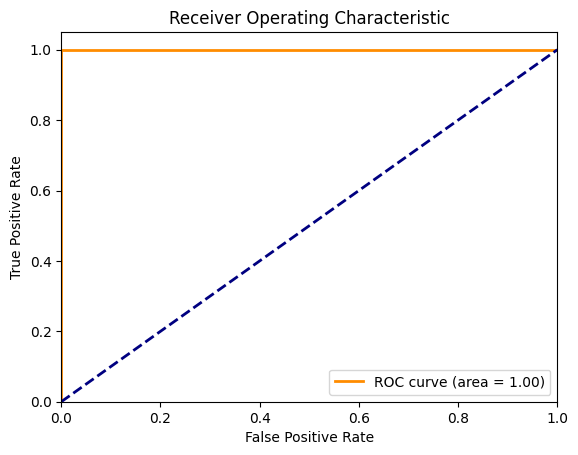

ROC AUC Score (Average): 1.00
Log Loss: 0.03
Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]
Classification Report:
              precision    recall  f1-score   support

           0       0.50      1.00      0.67         1
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         1
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         1
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00    

In [461]:
Y_pred_prob = best_classifier_svm.predict_proba(X_test)
Y_pred_prob = Y_pred_prob.toarray()
# Calculate the ROC AUC score for each disease label
roc_auc_scores = []
for i in range(y_test_encoded.shape[1]):
    auc_score = roc_auc_score(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc_scores.append(auc_score)

# ROC AUC score for the entire model
roc_auc_avg = roc_auc_score(y_test_encoded, Y_pred_prob, average="weighted")

# Log loss for the model
logloss = log_loss(y_test_encoded, Y_pred_prob)

Y_pred = best_classifier_svm.predict(X_test)
Y_pred = Y_pred.toarray()
confusion = confusion_matrix(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Classification Report
class_report = classification_report(y_test_encoded.argmax(axis=1), Y_pred.argmax(axis=1))

# Plot ROC curves
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_encoded.shape[1]):
    fpr[i], tpr[i], _ = roc_curve(y_test_encoded[:, i], Y_pred_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for a specific disease (change the index)
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print metrics
print(f"ROC AUC Score (Average): {roc_auc_avg:.2f}")
print(f"Log Loss: {logloss:.2f}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(class_report)


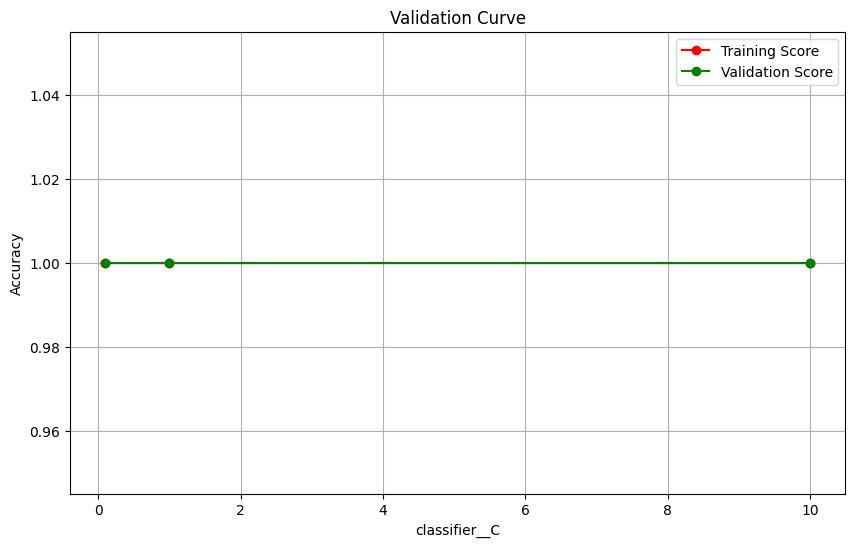

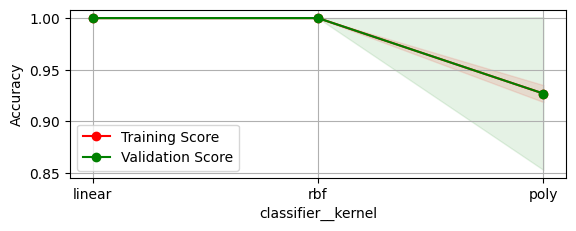

In [464]:
plt.figure(figsize=(10, 6))
index = 1

plt.title('Validation Curve')
for param_name, param_range in param_grid.items():

  train_scores, valid_scores = validation_curve(best_classifier_svm, X_train, y_train_encoded, param_name=param_name, param_range=param_range, cv=10, scoring='accuracy')

  # Calculate mean and standard deviation of training and validation scores
  train_scores_mean = np.mean(train_scores, axis=1)
  train_scores_std = np.std(train_scores, axis=1)
  valid_scores_mean = np.mean(valid_scores, axis=1)
  valid_scores_std = np.std(valid_scores, axis=1)
  plt.subplot(index, 1, 1)
  index += 1
  plt.xlabel(param_name)
  plt.ylabel('Accuracy')
  plt.grid()
  plt.fill_between(param_range, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color='r')
  plt.fill_between(param_range, valid_scores_mean - valid_scores_std, valid_scores_mean + valid_scores_std, alpha=0.1, color='g')
  plt.plot(param_range, train_scores_mean, 'o-', color='r', label='Training Score')
  plt.plot(param_range, valid_scores_mean, 'o-', color='g', label='Validation Score')
  plt.legend(loc='best')
  plt.show()


## Saving the model and label encoders

In [462]:
import joblib
dir_name = '/content/drive/MyDrive/models/'
joblib.dump(best_classifier_svm, '{}classifierchain_svm_classifier.joblib'.format(dir_name))

#joblib.dump(label_encoder, '{}onevsrest_decision_tree_label_encoder.joblib'.format(dir_name))

# Save the MultiLabelBinarizer
joblib.dump(mlb_diseases, '{}classifierchain_svm_multilabel_binarizer.joblib'.format(dir_name))

['/content/drive/MyDrive/models/classifierchain_svm_multilabel_binarizer.joblib']

In [463]:
from joblib import load

classifier_name = '{}classifierchain_svm_classifier.joblib'.format(dir_name)
mlb_name = '{}classifierchain_svm_multilabel_binarizer.joblib'.format(dir_name)

mlb = load(mlb_name)
# Load the trained classifier
classifier = load(classifier_name)


def predict_diseases(user_input):
    user_symptoms = create_multilabel_data(user_input)

    print(user_symptoms)
    user_symptoms = user_symptoms.fillna(0)
    # Make multi-label predictions
    predicted_probs = classifier.predict_proba(user_symptoms.values)

    print(predicted_probs)

    #disease_labels = mlb.inverse_transform(predicted_probs)
    results = {}
    # Create a dictionary to store results
    #for i, label in enumerate(disease_labels):
    #    results[label] = predicted_probs[0][i]

    sorted_results = {k: v for k, v in sorted(results.items(), key=lambda item: item[1], reverse=True)}

    return sorted_results

prediction = predict_diseases(['itching', 'skin_rash'])
#for disease, probability in prediction.items():
#    print(f"Disease: {disease}, Probability: {probability:.2f}")


#TODO: can make use of logistic regression, add some threshold, and then we can even make use of a subset of symptoms too



  itching skin_rash nodal_skin_eruptions continuous_sneezing shivering chills  \
0       1         1                  NaN                 NaN       NaN    NaN   

  joint_pain stomach_pain acidity ulcers_on_tongue  ... pus_filled_pimples  \
0        NaN          NaN     NaN              NaN  ...                NaN   

  blackheads scurring skin_peeling silver_like_dusting small_dents_in_nails  \
0        NaN      NaN          NaN                 NaN                  NaN   

  inflammatory_nails blister red_sore_around_nose yellow_crust_ooze  
0                NaN     NaN                  NaN               NaN  

[1 rows x 132 columns]
  (0, 0)	8.099976130027319e-05
  (0, 1)	0.000220807147844318
  (0, 2)	0.001532251287593418
  (0, 3)	0.00018716184432838496
  (0, 4)	0.0006950518616195918
  (0, 5)	0.0005113107786216891
  (0, 6)	0.00015675113918102527
  (0, 7)	0.0005462019151150967
  (0, 8)	0.0013450170650792326
  (0, 9)	0.0054687091108991705
  (0, 10)	0.00014845206025227803
  (0, 11)	4.83